In [10]:
import pandas as pd
import datetime
import os

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [12]:
targetdir = "./data/TransactionsPerDay/"
filename = "number_of_transactions_per_day.csv"

df = pd.read_csv(targetdir + filename)

In [13]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["date"])

In [14]:
df

,date,count
1226,2017-11-23,488
1184,2017-11-24,432
699,2017-11-25,388
108,2017-11-26,143
1244,2017-11-27,165
...,...,...
245,2021-04-23,103215
37,2021-04-24,114635
76,2021-04-25,129255
264,2021-04-26,134249


In [15]:
df[df["date"] < "2018-01-01"]["count"].sum()

252847

In [19]:
df[(df["date"] >= "2021-01-01") & (df["date"] < "2022-01-01")]["count"].sum()

3371420

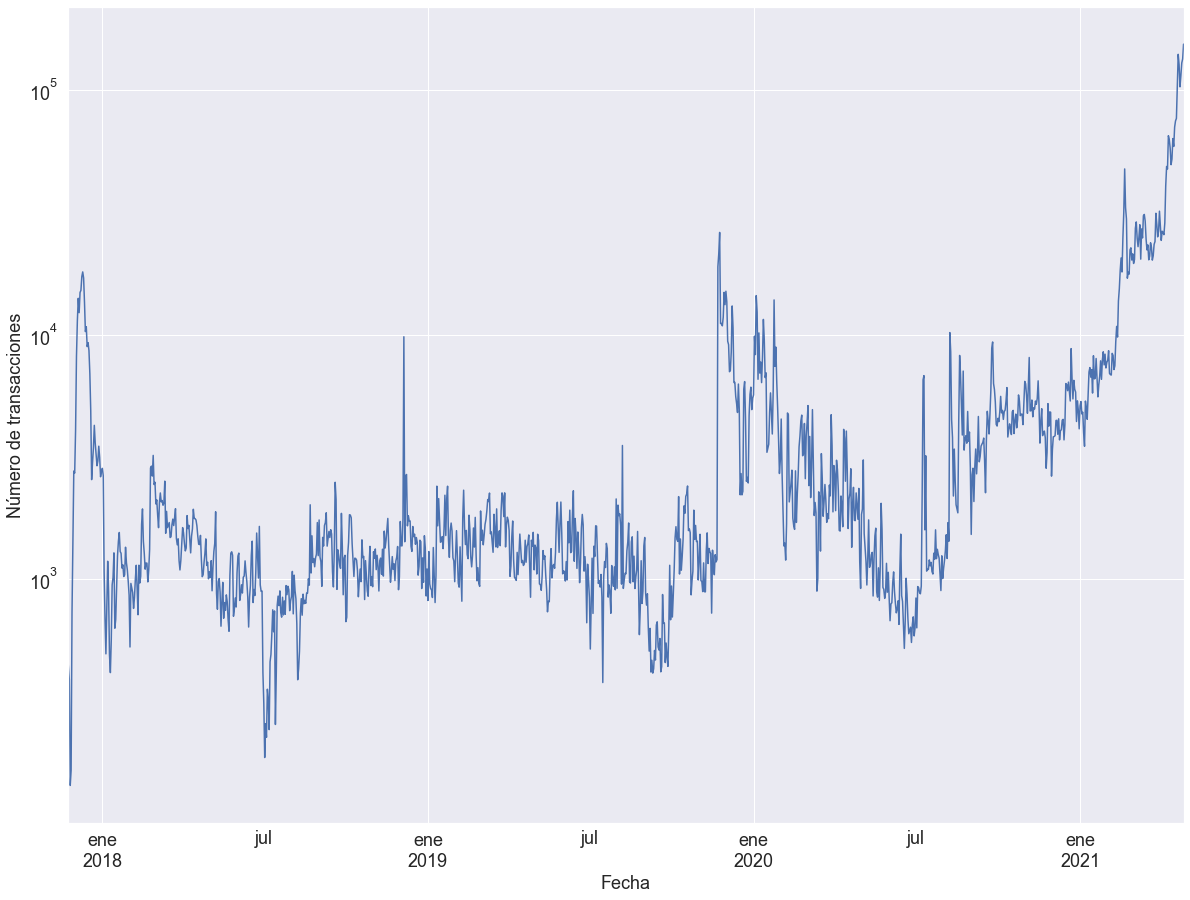

In [13]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df.plot(kind = 'line', x = 'date', y = 'count')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Número de transacciones", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

plt.savefig("./transactionsPerDay/transactions_per_day.svg", bbox_inches='tight')

In [42]:
df.sort_values(["count"], ascending=False)[:40]

,date,count
877,2021-04-27,154279
123,2021-04-21,140184
264,2021-04-26,134249
76,2021-04-25,129255
1016,2021-04-22,127109
37,2021-04-24,114635
245,2021-04-23,103215
509,2021-04-20,102279
840,2021-04-19,76663
653,2021-04-18,74878


In [38]:
df[(df["date"] > "2019-09-10") & (df["date"] < "2020-01-01")].sort_values(["count"],ascending=False)

,date,count
592,2019-11-24,26185
585,2019-11-23,21430
417,2019-11-22,18951
884,2019-12-01,15047
803,2019-11-29,14892
...,...,...
946,2019-09-24,455
160,2019-09-27,439
1100,2019-09-20,438
415,2019-09-11,429


In [12]:
df[df["date"] < "2018-01-01"].max()

date     2017-12-31 00:00:00
count                  18048
dtype: object

In [48]:
df[(df["date"] >= "2021-01-01") & (df["date"] < "2022-01-01")].max()

date     2021-04-27 00:00:00
count                 154279
dtype: object

In [29]:
df[(df["count"] == 9798)]

,date,count
625,2018-12-05,9798


In [33]:
df[df["count"] > 10000][:10]

,date,count
134,2017-12-04,11388
470,2017-12-05,14076
301,2017-12-06,12295
832,2017-12-07,14870
65,2017-12-08,15174
506,2017-12-09,17283
353,2017-12-10,18048
870,2017-12-11,17045
886,2017-12-12,13537
307,2017-12-13,10290


In [6]:
df_roll_w = df.rolling(window="30D", on="date").mean()
df_roll_w

,date,count
1226,2017-11-23,488.000000
1184,2017-11-24,460.000000
699,2017-11-25,436.000000
108,2017-11-26,362.750000
1244,2017-11-27,323.200000
...,...,...
245,2021-04-23,53051.000000
37,2021-04-24,56092.400000
76,2021-04-25,59599.766667
264,2021-04-26,63029.433333


In [7]:
df_roll_w[(df_roll_w["date"] > "2019-09-10") & (df_roll_w["date"] < "2020-01-01")].sort_values(["count"],ascending=False)

,date,count
1022,2019-12-21,9601.766667
660,2019-12-20,9442.400000
695,2019-12-19,9405.400000
91,2019-12-18,9373.666667
727,2019-12-17,9318.366667
...,...,...
177,2019-09-30,626.866667
208,2019-10-04,612.700000
127,2019-10-01,608.766667
1084,2019-10-03,605.500000


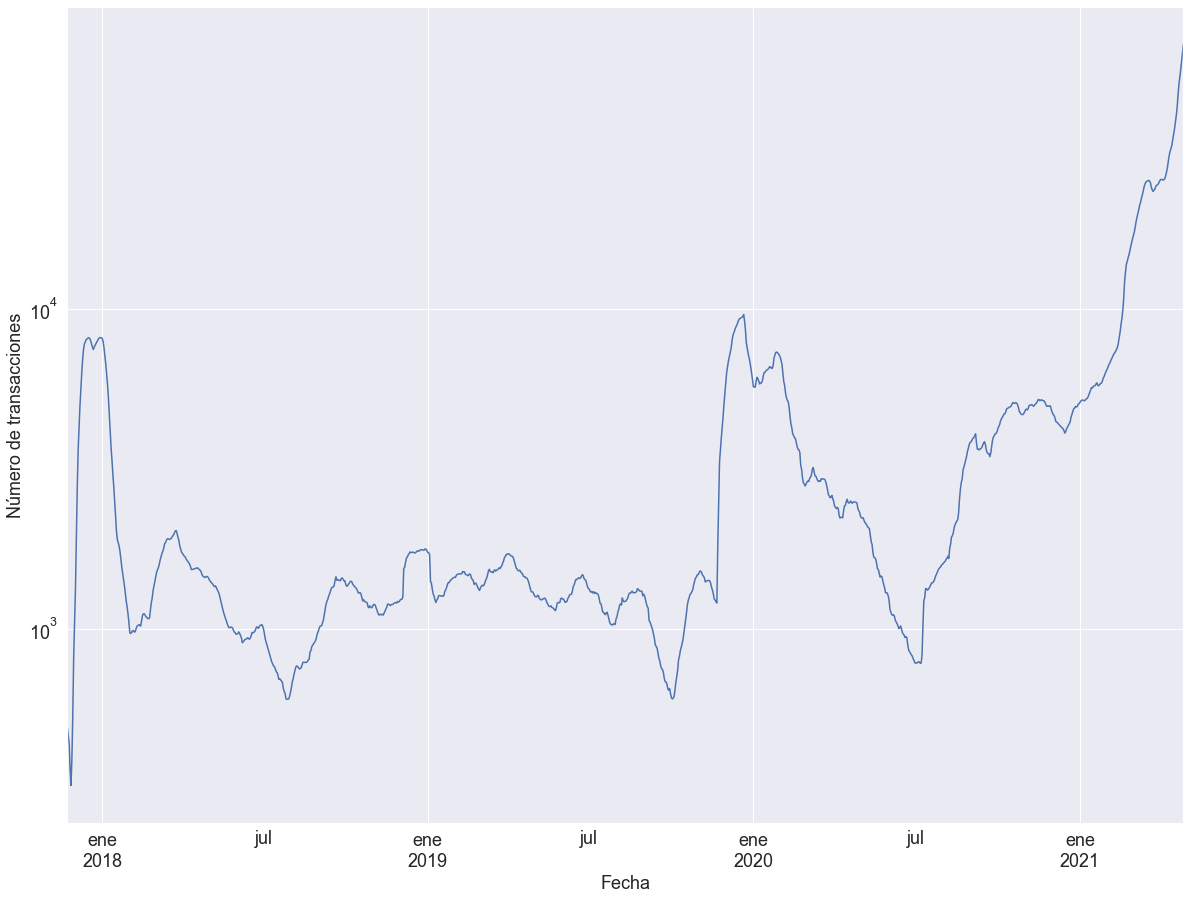

In [9]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df_roll_w.plot(kind = 'line', x = 'date', y = 'count')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Número de transacciones", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

plt.savefig("./transactionsPerDay/transactions_per_day_rolling_window.svg", bbox_inches='tight')

# Transactions per day and category

In [7]:
targetdir = "./data/TransactionsPerDayAndCategory/"
filename = "transactions_per_day_and_category.csv"

df_day_cat = pd.read_csv(targetdir + filename)

In [8]:
df_day_cat

,date,category,count
0,2020-02-22,Games,2450
1,2020-04-22,Games,963
2,2020-06-23,Games,179
3,2020-08-29,Games,1717
4,2020-08-09,Games,230
...,...,...,...
6289,2020-05-17,Collectible,28
6290,2020-07-28,Utility,1
6291,2020-11-28,Utility,12
6292,2020-12-08,Utility,10


In [14]:
df_day_cat[df_day_cat["date"] == "2017-12-10"]

,date,category,count
4412,2017-12-10,Art,18048


In [27]:
df_day_cat[(df_day_cat["date"] > "2018-09-10") & (df_day_cat["date"] < "2019-01-01") & 
           (df_day_cat["count"] > 4000)]

,date,category,count
4551,2018-12-05,Art,9516


In [20]:
df_day_cat[df_day_cat["count"] == 9516]

,date,category,count
4551,2018-12-05,Art,9516


In [28]:
df_day_cat[df_day_cat["date"] == "2018-12-05"]

,date,category,count
1612,2018-12-05,Metaverse,47
2919,2018-12-05,Other,43
3137,2018-12-05,Games,127
4551,2018-12-05,Art,9516
5649,2018-12-05,Collectible,65


In [39]:
df_day_cat[df_day_cat["date"] == "2019-11-24"]

,date,category,count
1614,2019-11-24,Metaverse,21
2199,2019-11-24,Art,687
2358,2019-11-24,Collectible,58
3491,2019-11-24,Other,17
6014,2019-11-24,Games,25402
